# Naïve Bayes

## Proyecto 2 - Entrega 3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Modelo de Regresión con Naïve Bayes

Debido a que Naïve Bayes es un modelo probabilístico que se encuentra diseñado para clasificar es importante notar que no esta diseñado para una regresión continua. Por lo que se decidió utilizar un Gaussian Process Regression que tiene una mayor flezibilidad para la regresión.

In [2]:
train_data = pd.read_csv("data/train_data_scaled.csv")
test_data = pd.read_csv("data/test_data_scaled.csv")
print(train_data.head())
print(test_data.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1.334629    0.294118     0.133562  0.024773    -0.795151    -1.416142   
1  0.684516    0.352941          NaN  0.044329     0.651479    -0.517200   
2  1.147187    0.352941          NaN  0.041814    -1.518467     3.078570   
3  1.662057    0.235294     0.133562  0.096427    -0.795151    -0.517200   
4  0.191000    0.000000     0.195205  0.041319    -0.071836     0.381743   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLw  \
0  -2.625409     -0.962566    0.000000   1.000000  ...           False   
1   0.653545      0.345679    0.047500   0.666667  ...           False   
2  -0.207594      0.781761    0.000000   1.000000  ...           False   
3   1.117235      0.975575    0.000000   0.666667  ...           False   
4   0.090492      0.684854    0.061875   1.000000  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

# Paso 1: Instanciamos el discretizador
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")

# Paso 2: Lo aplicamos al SalePrice de entrenamiento
train_data["SalePrice_Category"] = discretizer.fit_transform(train_data[["SalePrice"]])

# Paso 3: Transformamos los datos de prueba usando el mismo discretizador
test_data["SalePrice_Category"] = discretizer.transform(test_data[["SalePrice"]])


In [7]:
# Convertir SalePrice en 3 categorías: Economica, intermedia y cara
# 0 = economica, 1 = intermedia, 2 = cara
#discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
#train_data["SalePrice_Category"] = discretizer.fit_transform(train_data[["SalePrice"]])
#test_data["SalePrice_Category"] = discretizer.transform(test_data[["SalePrice"]])
X_train = train_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_train = train_data["SalePrice_Category"]

X_test = test_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_test = test_data["SalePrice_Category"]
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definir kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Crear el modelo
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Entrenar el modelo
gp_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gp = gp_model.predict(X_test)

# Evaluar el modelo
mae_gp = mean_absolute_error(y_test, y_pred_gp)
mse_gp = mean_squared_error(y_test, y_pred_gp)
r2_gp = r2_score(y_test, y_pred_gp)

print("Resultados de Gaussian Process Regression:")
print(f"MAE: {mae_gp:.2f}")
print(f"MSE: {mse_gp:.2f}")
print(f"R² Score: {r2_gp:.2f}")


Resultados de Gaussian Process Regression:
MAE: 0.30
MSE: 0.16
R² Score: 0.76


### Explicación de resultados obtenidos 

El modelo de Gaussian Process Regression (GPR) tiene un buen rendimiento, con un R² Score de 0.76, lo que significa que explica el 76% de la variabilidad en los precios de las casas.

### Comparación de resultados de regresión lineal y árbol de decisión

In [9]:
X_train = train_data.drop(columns=["SalePrice"])
y_train = train_data["SalePrice"]
X_test = test_data.drop(columns=["SalePrice"])
y_test = test_data["SalePrice"]
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Resultados de Regresión Lineal:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

Resultados de Regresión Lineal:
MAE: 0.03
MSE: 0.01
R² Score: 0.57


In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nResultados de Árbol de Decisión:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Resultados de Árbol de Decisión:
MAE: 0.03
MSE: 0.00
R² Score: 0.85


In [12]:
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Árbol de Decisión", "Gaussian Process Regression"],
    "MAE (Error Medio Absoluto)": [mae_lr, mae_dt, mae_gp],
    "MSE (Error Cuadrático Medio)": [mse_lr, mse_dt, mse_gp],
    "R² Score": [r2_lr, r2_dt, r2_gp]
})
print(resultados)

                        Modelo  MAE (Error Medio Absoluto)  \
0             Regresión Lineal                    0.032096   
1            Árbol de Decisión                    0.028353   
2  Gaussian Process Regression                    0.303659   

   MSE (Error Cuadrático Medio)  R² Score  
0                      0.005514  0.566883  
1                      0.001869  0.853177  
2                      0.164353  0.758099  


C:\Users\Cindy\AppData\Local\Temp\ipykernel_10656\2879455252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="R² Score", data=resultados, palette="viridis")


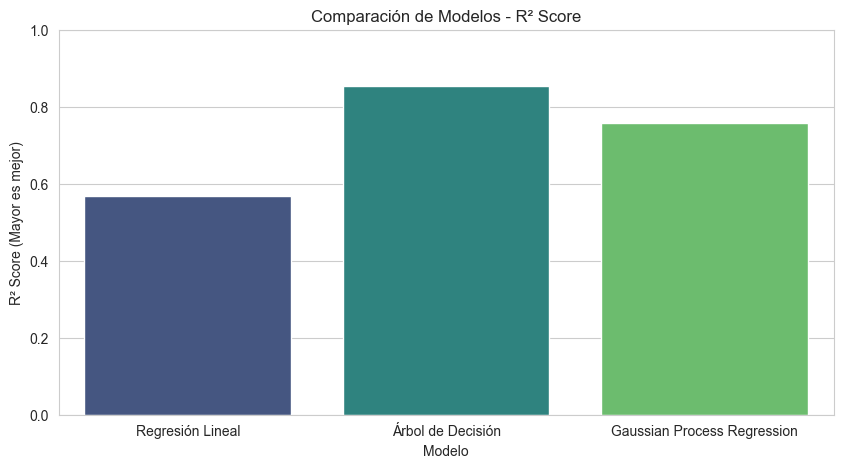

C:\Users\Cindy\AppData\Local\Temp\ipykernel_10656\2879455252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="MAE (Error Medio Absoluto)", data=resultados, palette="magma")


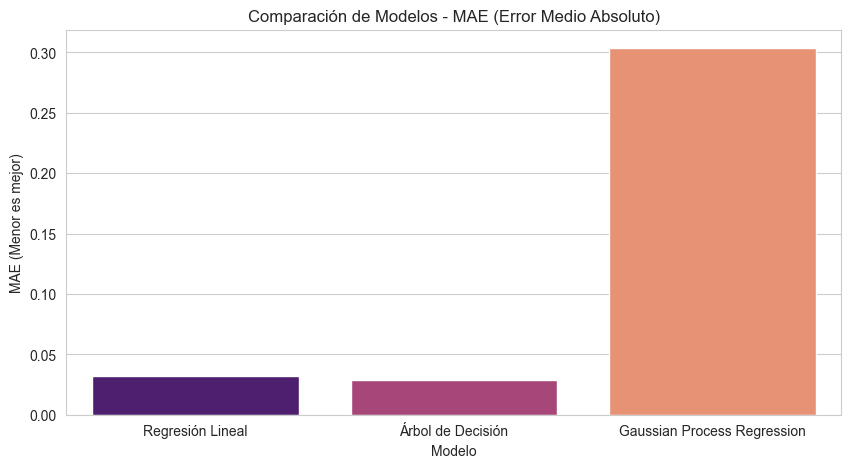

C:\Users\Cindy\AppData\Local\Temp\ipykernel_10656\2879455252.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="MSE (Error Cuadrático Medio)", data=resultados, palette="coolwarm")


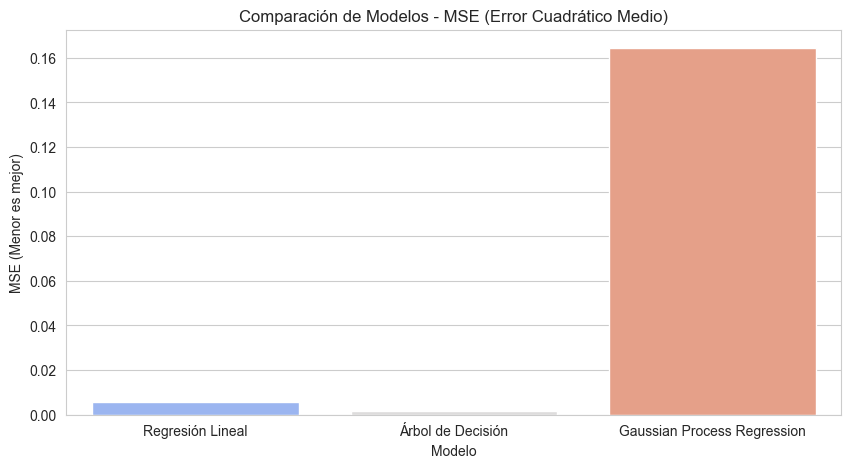

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="R² Score", data=resultados, palette="viridis")
plt.title("Comparación de Modelos - R² Score")
plt.ylabel("R² Score (Mayor es mejor)")
plt.ylim(0, 1) 
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="MAE (Error Medio Absoluto)", data=resultados, palette="magma")
plt.title("Comparación de Modelos - MAE (Error Medio Absoluto)")
plt.ylabel("MAE (Menor es mejor)")
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="MSE (Error Cuadrático Medio)", data=resultados, palette="coolwarm")
plt.title("Comparación de Modelos - MSE (Error Cuadrático Medio)")
plt.ylabel("MSE (Menor es mejor)")
plt.show()

### ¿Qué modelo funcionó mejor?

En base a los resultados obtenidos se puede observar que el modelo que realiza las mejores predicciones es el Árbol de Decision con un valor de $R^2$ de 0.853, seguido por NB con un valor de $R^2$ de 0.758 y por último la regresión lineal con un valor de  $R^2$ de 0.566 respectivamente.


### Modelo de Clasificación con Naïve Bayes

In [ ]:
# 1. Separar las variables independientes (X) y dependiente (y) para clasificación
X_train_clf = train_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_train_clf = train_data["SalePrice_Category"]

X_test_clf = test_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_test_clf = test_data["SalePrice_Category"]

# 2. Rellenar valores nulos 
X_train_clf = X_train_clf.fillna(X_train_clf.mean())
X_test_clf = X_test_clf.fillna(X_test_clf.mean())

# 3. Crear y entrenar el modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_clf, y_train_clf)

# 4. Hacer predicciones con el conjunto de prueba
y_pred_nb = nb_model.predict(X_test_clf)



### Eficiencia de los algoritmos

In [21]:
accuracy_nb = accuracy_score(y_test_clf, y_pred_nb)
print(f"Precisión del modelo Naive Bayes: {accuracy_nb:.2f}")

reporte_nb = classification_report(
    y_test_clf,
    y_pred_nb,
    target_names=["Económica", "Intermedia", "Cara"]
)

print("Reporte de Clasificación:\n")
print(reporte_nb)

Precisión del modelo Naive Bayes: 0.56
Reporte de Clasificación:

              precision    recall  f1-score   support

   Económica       0.84      0.38      0.53       125
  Intermedia       0.38      0.43      0.40       117
        Cara       0.61      0.87      0.72       123

    accuracy                           0.56       365
   macro avg       0.61      0.56      0.55       365
weighted avg       0.61      0.56      0.55       365



### Análisis de eficiencia - Matriz de confusión

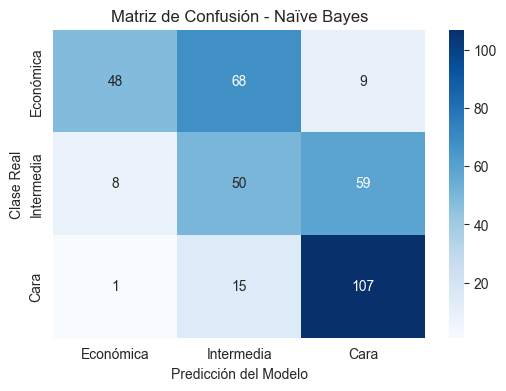

In [20]:
conf_matrix = confusion_matrix(y_test_clf, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Económica", "Intermedia", "Cara"],
            yticklabels=["Económica", "Intermedia", "Cara"])
plt.title("Matriz de Confusión - Naïve Bayes")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Clase Real")
plt.show()

### Errores y su importancia

 **¿Dónde se equivocó más el modelo?**
- Mayor error: Confundió 68 casas económicas como intermedias

- Mayor acierto: 107 casas caras predichas correctamente

**¿Qué tan graves son los errores?**
- Confundir económica como intermedia → puede hacer que alguien pague más por una propiedad barata.
- Confundir intermedia como cara → puede dificultar la venta, alejar compradores.

### ¿Existe un sobre ajuste del modelo?

In [22]:
# Predicciones en el conjunto de entrenamiento
y_train_pred_nb = nb_model.predict(X_train_clf)
accuracy_train = accuracy_score(y_train_clf, y_train_pred_nb)

# Ya tenemos las predicciones en test: y_pred_nb
accuracy_test = accuracy_score(y_test_clf, y_pred_nb)

print(f"Accuracy en entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en prueba: {accuracy_test:.2f}")

Accuracy en entrenamiento: 0.66
Accuracy en prueba: 0.56


- La diferencia entre ambos valores es de 0.10 (10%)

- Es una diferencia moderada, pero no tan grande como para decir que hay un sobreajuste severo.

- El modelo aprende un poco mejor los datos que ya conoce (entrenamiento), pero no se cae completamente en datos nuevos

***Esto indica que el modelo puede estar ligeramente sesgado o limitado, más que sobreajustado.***

### Modelo con validación cruzada

### Comparación del modelo con validación cruzada con los modelos anteriiores

### Uso de valores de hiperparámetros

### Comparación de eficiencia de algoritmos

### Conclusiones